<a href="https://colab.research.google.com/github/franciellyl/data_science/blob/main/Histograma_para_Data_Science_An%C3%A1lise_de_Notifica%C3%A7%C3%B5es_de_casos_suspeitos_de_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os

#configuration
pd.options.display.max_columns = None
%matplotlib inline

In [19]:
#URL com os dados das notificações de Síndrome Gripal de casos leves a moderados suspeitos de COVID-19.
#Dados referentes ao volume 1 de 7 do Estado de São Paulo.
DATA_URL ="https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-sp-1.csv"

def get_covid_data(data_url=DATA_URL):
  """
  Baixar os dados das notificações de Síndrome Gripal de casos leves a moderados supeitos de COVID-19.
  
  Parâmetros: 
    data_url(string): Endereço do arquivo csv com dados das notificações.
  Retorno:
    None
  """
  csv_file = data_url.split(os.sep)[-1]

  if not os.path.isfile(csv_file):
    urllib.request.urlretrieve(DATA_URL, 'dados-sp-1.csv')
    print("[+] Arquivo baixado.")

  else:
    print("[+] O arquivo '{}' já existe na pasta.".format(csv_file))

#baixar dados das notificações
get_covid_data()


[+] O arquivo 'dados-sp-1.csv' já existe na pasta.


In [20]:
#importar dados do csv para um DataFrame no Pandas
df = pd.read_csv('dados-sp-1.csv', sep=";", encoding="ISO-8859-1")

#verificar a quantidade de entradas do arquivo
print("{} colunas e {} linhas de entrada.".format(df.shape[1], df.shape[0]))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,21,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


30 colunas e 1000000 linhas de entrada.


In [14]:
#verificar primeiras entradas do DataFrame
df.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,cnes,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,uASeuqrGky,2020-07-01T19:07:21.317Z,2020-06-19T03:00:00.000Z,1991-05-12T03:00:00.000Z,"Dor de Garganta, Febre, Tosse",Não,NaN,NaN,Concluído,2020-06-25T03:00:00.000Z,RT-PCR,Negativo,undefined,Feminino,SÃO PAULO,35,São José dos Campos,3549904,undefined,3042529,SÃO PAULO,35,São José dos Campos,3549904,undefined,undefined,29,2020-07-03T03:00:00.000Z,Ignorado,Descartado
1,UHCw5QTQE6,2020-07-07T13:40:32.574Z,2020-07-03T03:00:00.000Z,1972-11-04T03:00:00.000Z,"Febre, Tosse, Outros",Não,NaN,NaN,Concluído,2020-07-07T03:00:00.000Z,RT-PCR,Negativo,undefined,Feminino,SÃO PAULO,35,Jales,3524808,undefined,6371531,SÃO PAULO,35,Jales,3524808,undefined,undefined,47,2020-07-10T03:00:00.000Z,Cura,Descartado
2,102460,2020-03-12T03:00:00.000Z,2020-03-09T03:00:00.000Z,1970-08-11T03:00:00.000Z,"Dispnéia,Febre,Tosse",Não,NaN,NaN,Concluído,2020-04-28T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,SÃO PAULO,undefined,São Sebastião,undefined,undefined,undefined,NaN,undefined,Sao Sebastiao,undefined,undefined,undefined,50,2020-07-10T03:00:00.000Z,Cura,Confirmado Laboratorial
3,WWJd56olVE,2020-07-10T18:36:00.853Z,2020-07-01T03:00:00.000Z,1990-06-11T03:00:00.000Z,Dor de Garganta,Não,NaN,NaN,Concluído,2020-07-06T03:00:00.000Z,RT-PCR,Negativo,undefined,Masculino,SÃO PAULO,35,Osasco,3534401,undefined,2058391,SÃO PAULO,35,São Paulo,3550308,undefined,undefined,30,NaN,NaN,NaN
4,Y900FAGdsH,2020-06-29T03:00:00.000Z,2020-06-05T03:00:00.000Z,1964-02-11T02:00:00.000Z,"Febre, Tosse, Outros",Sim,2235 - ENFERMEIRO,NaN,Concluído,2020-06-29T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,undefined,Feminino,SÃO PAULO,35,São Paulo,3550308,undefined,2027062,SÃO PAULO,35,São Paulo,3550308,undefined,undefined,56,NaN,NaN,NaN


**Histograma**

De maneira resumida, um histograma é uma representação gráfica, em colunas(retângulos), de um conjunto de dados previamento divididos em classes uniformes. Também é conhecido como "Diagrama de Dispersão de Frequência".
Tem como objetivo fornecer um caminho para avaliar a distribuição dos dados e permitir a verificação do comportamento de um processo em relação a sua especificação.

Sem saber nada sobre a variável 'ProfissionalSaude', veja como só olhar o histograma facilita o trabalho.

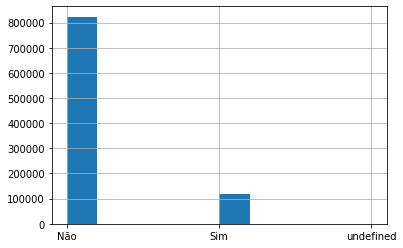

In [15]:
#plotar o histograma se a pessoa é profissional da saúde ou não.
df['profissionalSaude'].hist();

Analisando rapidamente o gráfico acima, conseguimos identificar que no primeiro volume de casos suspeitos registrados no Estado de São Paulo, a grande maioria não são profissionais da área da saúde.

Conseguimos também identificar o sexo do indivíduo conforme gráfico a seguir:

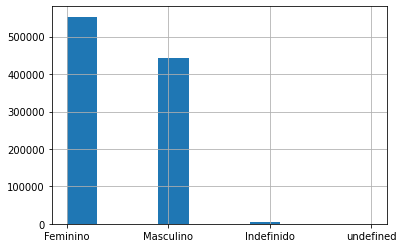

In [17]:
#plotar o histograma com o sexo do indivíduo
df['sexo'].hist();

Além de identificarmos se o indíviduo é da área da saúde ou não e o seu sexo, conseguimos identificar se o resultado do teste foi "Positivo" ou "Negativo" conforme gráfico a seguir:

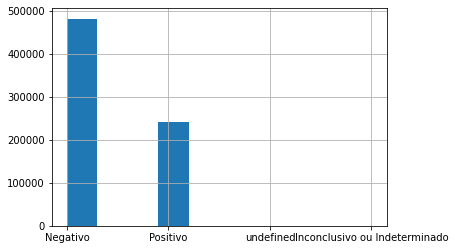

In [18]:
#plotar histograma com resultado do teste
df['resultadoTeste'].hist();

Conforme observamos, o histograma facilita o entendimento de uma grande quantidade de dados e auxilia na avaliação da dispersão de frequência.